### Team : Group 6 (0501)


# Project Overview

# Milestones and Progress

# Data Acquisition and Cleaning (Code + Markdown)

## 1. Load file data into a dataframe

First, we will import the relevant libraries

In [109]:
#importing the relevant libraries
from numpy import nan as NA
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import sys
from wordcloud import WordCloud
import json

In the following lines of code, we have described how we used the presence of duplicates to pre-process data to acquire the videos trending the most in our dataset. Eventually, we have removed these duplicates to work with only the trending data.

In [28]:
# Importing USvideos.csv which contains trending video content in the US
df=pd.read_csv("USvideos.csv", usecols=[items for items in range(16)], sep=",")

In [29]:
#We first study the shape of this dataset
df.shape

(40949, 16)

Let's have a look at the first five rows of the data and check whether there are any columns that have null/missing values.

In [30]:
# Have a look at the first five rows of the data
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## 2 Handling missing/duplicate data

In [31]:
# check whether there are any columns that have null/missing values.
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Only column "description" has missing values. The data in this column is mostly about additional information that the publishers want the audiences know about the video. Therefore, we do not need to fill out data in this column or do any missing value treatment.

Now we will search if there are any rows in the dataset that are entirely duplicate

In [32]:
df.duplicated().sum()

48

In [34]:
df.drop_duplicates(inplace=True)

Next, we want to analyze the data based on video's ids, so we need to make sure that all video's ids are unique. The other columns do not need to be unique

In [35]:
df.duplicated(subset='video_id').sum()

34619

We can see that there are a lot of duplicates in the "video_id" column. We choose randomly any one video's id that have duplicates to find the reason

In [36]:
df[df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34152,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268143,2399,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...
34362,uxbQATBAXf8,18.13.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",13293647,334533,3302,8333,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...
34792,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374825,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...


The result above shows that one video can be trending many times (many days). Of all records with the same video's id, columns "trending date", "views", "like", "dislikes", and "comment_count" have different values. We will create a column named 'trending_date_count' that indicates the number of time that video is on trending. After that, we will keep the latest record with the latest number of views, like, dislikes, and comment_count, and remove the other rows with the same video_id and older statistical numbers.

We want to capture this information, as knowing the number of times a video trended at the top provides meaningful information in how many times it reached the top

In [37]:
# Create a column named 'trending_date_counts' that indicates the number of time that video is on trending.
df['trending_date_count'] = df.groupby(['video_id'])['trending_date'].transform('count')

In [40]:
# Now, we will visualise a few lines of this new column
df['trending_date_count'].head(10)

0    7
1    7
2    7
3    7
4    6
5    7
6    5
7    6
8    2
9    2
Name: trending_date_count, dtype: int64

Now, we will remove the other rows with the same video_id and non-updated numbers of likes, shares and comments

In [41]:
# remove the other rows with the same video_id and older numbers.
df.drop_duplicates(subset='video_id', keep='last', inplace=True)

In [43]:
# Re-verifying that our non-duplicate row now has only one unique row in the dataframe
df[df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_date_count
34792,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374825,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,3


In [45]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_date_count
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1


We can clearly see that we need to reset the index of the dataset after pre-processing

In [46]:
df.reset_index(drop = True, inplace = True)

In [47]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_date_count
0,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1
1,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1


## 3. Url Text Data Preprocessing

In the following few lines of code, we have used the text present in the "description" column to extract meaningful urls, and store them as a different column altogether. To do this, we have used the concept of regular expressions 

In [54]:
df['description_url']=df["description"].str.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

Now, we see what errors persist in the "description" column

In [56]:
df['description_url']

0       [https://www.nfl.com/gamepass?campaign=sp-nf-g...
1       [http://twitter.com/screenjunkies\nLike, http:...
2       [http://bit.ly/1rbfUog\n\nWorld, https://www.y...
3       [http://www.youtube.com/subscription_center?ad...
4                                                      []
                              ...                        
6277                                                   []
6278                                                  NaN
6279    [https://goo.gl/C92AmbSHOP, https://goo.gl/VN6...
6280    [https://bit.ly/HISHEPlaylistSubscribe, https:...
6281    [https://www.callofduty.com/blackops4/buyFollo...
Name: description_url, Length: 6282, dtype: object

1) NaN values exist


2) Some urls contain |n which should be removed


3) Some urls are combined together with "\\n" as connection

In [57]:
df['description_url'].isnull().sum()

99

In [59]:
df.shape

(6282, 19)

We observe that approximately, 1.57% of the rows have missing values for the "description" column. Thus, we decide to add 0 in those rows for the "description" variable, instead of losing the data.

In [60]:
df['description_url']=df['description_url'].fillna(0)

Now, we further clean this column by removing "\n(newline token) from its string value

In [61]:
# Calculate the length of each observation of description_url column
df['len']=df['description_url'].apply(lambda x: len(x) if x!=0 else 0)

In [63]:
# Remove "\\n" in description_url column
urls=[]
for i in range(len(df)):
    if df['len'][i]!=0:
        url=[]
        for j in df['description_url'][i]:
            suburl=0
            suburl=j.split('\\n')
            for item in range(len(suburl)):
                if suburl[item].find('http')!=-1:
                    url.append(suburl[item])
        urls.append(url)
    else:
        urls.append(0)

In [64]:
# Create a column to save the pure urls
df['pure_description_url']=urls

In [67]:
# Now, we see a few lines of this newly created column
df['pure_description_url'][0]

['https://www.nfl.com/gamepass?campaign=sp-nf-gd-ot-yt-3000342',
 'http://www.nfl.com/fantasyfootball',
 'http://j.mp/1L0bVBu',
 'http://www.youtube.com/nflnetwork',
 'http://www.youtube.com/nflfilms',
 'http://www.nfl.com/',
 'https://www.nfl.com/now',
 'http://www.nfl.com/podcasts',
 'http://nflnonline.nfl.com/',
 'https://www.nfl.com/apps',
 'http://www.nfl.com/schedules',
 'http://www.nfl.com/tickets',
 'http://www.nflshop.com/source/bm-nflcom-Header-Shop-Tab',
 'https://www.facebook.com/NFL',
 'https://twitter.com/NFL',
 'https://instagram.com/nfl/']

Since we have cleaned and stored these urls into a new column entirely, we will now remove this text data from the "description" column in order to ensure that text data does not repeat itself in our dataset

In [68]:
df['description_text']=df['description']

In [69]:
for i in range(len(df)):
    if df['len'][i]!=0:
        for j in range(df['len'][i]):
            df['description_text'][i]=df['description_text'][i].replace(df['description_url'][i][j],'')

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
# Once done, we verify if the description text is truly free of its urls
df['description_text'][1]

"With Justice League approaching fast we rewatched all four movies in the DCEU so that you don't have too. Spencer Gilbert breaks down the plot and things that will be important going forward!\\n\\nGot a tip? Email us ► tips@screenjunkies.com\\nFollow us on Twitter ►  us on Facebook ►  Screen Junkies Gear! ►► "

As we can see, the new text description of the first video record contains no url within it.

## 4. Date Pre-processing

In the following lines of code, we have used the  "CA videos" data to perform data cleaning and processing.Here, we have changed the trending date into a well-perfected format and then cast it into the datetime type. For the lengthy publish time, we have split it into two columns - publish date and exact time(hour-miniute-seconds) for better readable data. For other columns, some data still needs to be changed into right type.For future analysis, we have normalised some of our key variable data (likes, dislikes and comment count) to reduce the skewness when coping with a large data pool.Furthermore, we have used a bar chart  and  a wordcloud to find out the frequency of different words that occur in "title name" which is title of the video. Finally, we have presented the distribution between 'like' and 'dislike' columns.

In [6]:
#/Users/apple/Desktop/youtube-new/CAvideos.csv 
# Import data
path = "C:\\Users\\Aishwarya\\Downloads\\Acads\\Semester 2\\Prof Bono\\Bono Project"
df=pd.read_csv(path+"/CAvideos.csv", usecols=[items for items in range(16)], sep=",")
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In the following few lines of code, we have changed the trending_date format to a more readable form

In [7]:
#change the trending_date
df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(df['trending_date'][0])
df['new_column']='20'
df['trending_date'] = df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
df['trending_date'] = pd.to_datetime(df['trending_date'],format='%Y-%d-%m')         
del df['new_column']                            
#type(df['trending_date'][0])

In [9]:
#Now, we view the result
df['trending_date'].head(3)

0   2017-11-14
1   2017-11-14
2   2017-11-14
Name: trending_date, dtype: datetime64[ns]

Now, we split the publish_time column into publish date and exact time to have more specific information about the same

In [10]:
#change the publish_time column to a better, readable format
df.insert(5,'publish_date',df['publish_time'].map(lambda name:name.split('T')[0])) 
df['publish_time']=df['publish_time'].map(lambda name:name.split('T')[1])
df['publish_date'] = pd.to_datetime(df['publish_date']) 
df['publish_time'] = pd.to_datetime(df['publish_time']) 

In [14]:
#Now, we will study the data-types of each column
df.info() #df.dtypes
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
video_id                  40881 non-null object
trending_date             40881 non-null datetime64[ns]
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_date              40881 non-null datetime64[ns]
publish_time              40881 non-null datetime64[ns, UTC]
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), datetime64[ns](2

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype='object')

In [15]:
# Translate the boolean values into numeric values
df["comments_disabled"]=df["comments_disabled"].astype(int)
df["ratings_disabled"]=df["ratings_disabled"].astype(int)
df["video_error_or_removed"]=df["video_error_or_removed"].astype(int)

In [16]:
type(df['comments_disabled'][9]) # confirming that our conversion was successful

numpy.int32

## 5. Normalization of data

Oftentime, when we are seeking for relations between variables, we tend to normalize them, which refers to bringing them down to a scale which is comparable between variables. This helps us reduce the skewness present withing the variable data, which is the one-sided majority accumulation of the variable data when a histogram of the same is plotted.

In [17]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
import numpy as np
# Normalize views
x_array = np.array(df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
df['comment_count']=normalized_C_dataframe.T

Now, we will visualise how our normalised variables look

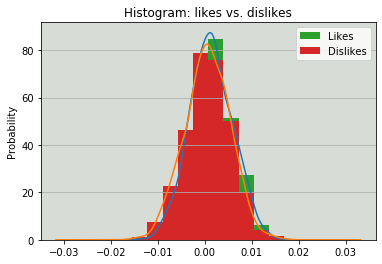

In [18]:
# draw the graph from the distribution between 'likes' and 'dislikes'
means = df['likes'].mean(), df['dislikes'].mean()
stdevs = df['likes'].std(axis = 0, skipna = True), df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['Likes', 'Dislikes'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: likes vs. dislikes')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

From the above visualisation, we can see that the skewness of these variables has been removed

## 6.Title Text Processing

Now, we will try to see which are the most common words used while giving a title to a video

In [19]:
# present the frenquency of trendy title
df["title"]=df["title"].astype(str)
df_new = df[df['title'].notnull()]

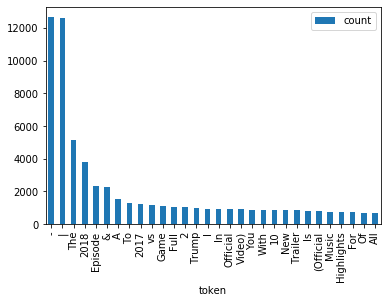

In [26]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))
counter.most_common(30)

freq_df=pd.DataFrame.from_records(counter.most_common(30),
                                  columns=['token','count'])
#create bar plot
freq_df.plot(kind='bar',x='token');

In the above bar graph, we can see how from left to right the most common tokens/words become less common as their frequency of occurence decreases

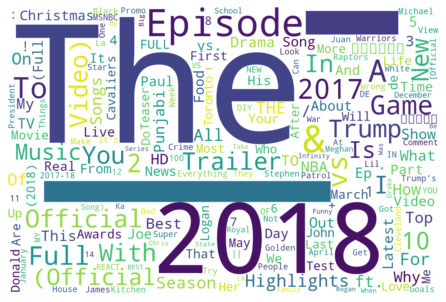

In [27]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))

#covert list of tuples onto wordcloud
from wordcloud import WordCloud

def wordcloud(counter):
    wc=WordCloud(width=1200,height=800,
                 background_color='white',
                 max_words=200)
    wc.generate_from_frequencies(counter)

    #plot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#create wordcloud
wordcloud(counter)

We see from the above word cloud, that words such as "The","2018" and "Episode" appear a huge number of times. We can thus infer that a lot of the videos may have trended in the year "2018"

## 7. Json Data Mapping (Category)

Our data along with csv files, has associated json files with it which contains information about the type of video present in the corresponding csv files. In the following few lines of code, we have used information from this json file and mapped into onto our csv file to store the name of the video category corresponding to each video

In [86]:
#reading the required dataset
df_US = pd.read_csv("USvideos.csv")

In [87]:
with open('US_category_id.json') as json_data:
    d = json.load(json_data)
    json_data.close()

#creating a list of dictionary of json objects    
list_of_json_objects = (d['items'])

In [88]:
#creating a dictionary to store category ids as keys and category names as values
catid_names = {}

for i in range(len(list_of_json_objects)):
    catid_names[i] = list_of_json_objects[i]['snippet']['title']

In [89]:
#printing the dictionary
catid_names

{0: 'Film & Animation',
 1: 'Autos & Vehicles',
 2: 'Music',
 3: 'Pets & Animals',
 4: 'Sports',
 5: 'Short Movies',
 6: 'Travel & Events',
 7: 'Gaming',
 8: 'Videoblogging',
 9: 'People & Blogs',
 10: 'Comedy',
 11: 'Entertainment',
 12: 'News & Politics',
 13: 'Howto & Style',
 14: 'Education',
 15: 'Science & Technology',
 16: 'Nonprofits & Activism',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

In [90]:
#replacing category_id column with category_name column
for i in range(len(df_US)):
    category = df_US['category_id'][i]
    if category not in catid_names.keys():
        df_US['category_id'][i] = "Other"
    else:
        df_US['category_id'][i] = catid_names[category]

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [91]:
df_US['category_id'].head(6)

0    Documentary
1         Family
2          Drama
3         Family
4         Family
5       Thriller
Name: category_id, dtype: object

In [92]:
df_US.rename(columns={'category_id':'category_name'},inplace=True)

## 8. Video Tag Data Cleaning

Now we will deal with the "tags" column and try to convert it to a list as well as store the number of tags associated with a video in a new column

In [93]:
df_US['Tags'] = df_US['tags'].map(lambda tags:tags.split('|'))

In [95]:
# We now view a few lines of the Tags column to see the list created
df_US['Tags'].head(4)

0                                    [SHANtell martin]
1    [last week tonight trump presidency, "last wee...
2    [racist superman, "rudy", "mancuso", "king", "...
3    [rhett and link, "gmm", "good mythical morning...
Name: Tags, dtype: object

From the content of these Tag lists, we can see that some of the list elements are quoted in double-inverted commas, which is unnecesary. Thus, we will eliminate these characters

In [96]:
for i in range(len(df_US['Tags'])):
    #k = df_US['Tags'][i]
    for k in range(len(df_US['Tags'][i])):
        df_US['Tags'][i][k] = df_US['Tags'][i][k].replace('\"','').rstrip().lstrip()

In [97]:
#Now, we will view our results of the clean column df_US['Tags']
df_US['Tags'].head(3)

0                                    [SHANtell martin]
1    [last week tonight trump presidency, last week...
2    [racist superman, rudy, mancuso, king, bach, r...
Name: Tags, dtype: object

Thus, we have gotten rid of the " characters. Now, we will calculate the count of tags for each video and store it in a new column

In [98]:
df_US['TagCount'] = df_US['Tags'].map(lambda x:len(x))

In [99]:
#Viewing the results of the new column "TagCount"
df_US['TagCount'].head()

0     1
1     4
2    23
3    27
4    14
Name: TagCount, dtype: int64

## 9. Dataset Merging

Now, we will shift gears to assign each video record to one country, the country that it belongs to. Since we have over 5 different data files, each belonging to a different country, we have used the following code on only 3 of them for demonstration purpose

In [101]:
df_CA = pd.read_csv(r"C:\\Users\\Aishwarya\\Downloads\\Acads\\Semester 2\\Prof Bono\\Bono Project\\CAvideos.csv", encoding='utf-8')
df_DE = pd.read_csv(r"C:\\Users\\Aishwarya\\Downloads\\Acads\\Semester 2\\Prof Bono\\Bono Project\\DEvideos.csv", encoding='utf-8')
df_FR = pd.read_csv(r"C:\\Users\\Aishwarya\\Downloads\\Acads\\Semester 2\\Prof Bono\\Bono Project\\FRvideos.csv", encoding='utf-8')

In [102]:
#adding the "Country" column for all datasets
names_of_countries = ['CA','DE','FR']
names_of_dataframes = [df_CA,df_DE,df_FR]
for i in range(len(names_of_countries)):
    names_of_dataframes[i]['Country'] = names_of_countries[i]

In [103]:
#Creating a list of all the datasets
final_df = []

for i in range(len(names_of_dataframes)):
    final_df.append(names_of_dataframes[i])

In [105]:
#combining all datasets into one
jumbo_df = pd.DataFrame(final_df[0])
for i in range(0,3):
    jumbo_df = jumbo_df.append(final_df[i])

In [106]:
# checking all unique values of the column "Country" to verify if the dataframes have been successfully merged
jumbo_df['Country'].unique()

array(['CA', 'DE', 'FR'], dtype=object)

In [107]:
#checking the length of the new merged dataset
len(jumbo_df)

163326

Thus, we can see that we have added a new column "Country" that stores the abbreviated Country form for each video in our final combined dataframe